In [19]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [25]:
#read the data from the file
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [26]:
#groupby,select the month to calculate
group_data = ds.sst.groupby('time.month')
#calculate the anomalies, use the data minus the mean data
sst_anom = group_data - group_data.mean(dim='time')
sst_anom
#rolling mean is the method to calculate the 3 months rolling average data, it's like 123, 234, 345 and so on
ds_anom_rolling = sst_anom.rolling(time=3, center=True).mean()
#select the region and get the mean value
region=ds_anom_rolling.sel(lon=slice(190, 240), lat=slice(-5, 5),time=slice('2000','2020'))
sst_mean=region.mean(dim=['lat', 'lon'])
time = ds['time'].sel(time=slice('2000','2020'))

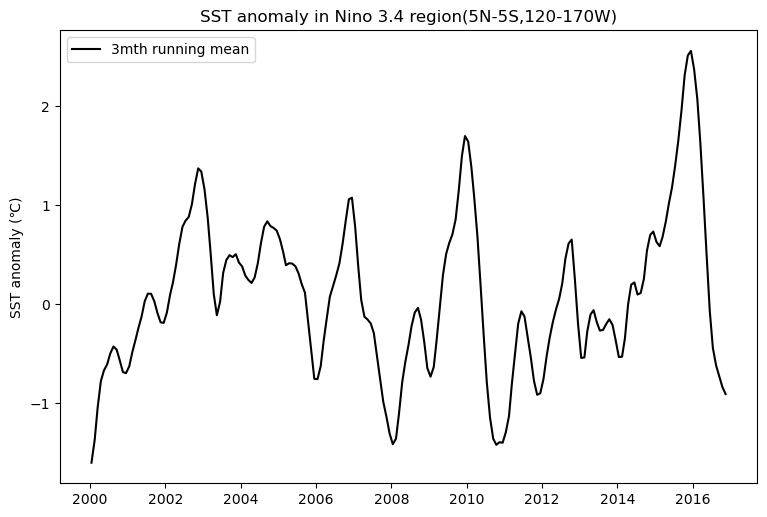

In [23]:
#plot the figure, positive means over the average value and vice versa
plt.figure(figsize=(9,6), dpi=100)
plt.plot(time,sst_mean,color='k',label='3mth running mean')
plt.title('SST anomaly in Nino 3.4 region(5N-5S,120-170W)') 
plt.ylabel('SST anomaly (℃)')
plt.legend(loc='best')
plt.show()